# Data Analysis - Lab 3 Ex C
### M. Sébastien MASCHA & M. Sauvage Pierre
### ISEP Paris – September 24th, 2019
<br/>
<br/>

___
# Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:
 
- Numpy to manipulate arrays
- matplotlib to plot graphics
- pandas to import csv
- scipy for mathematicals usage
- maths for sqrt, pi, exp

In [43]:
# coding: utf-8

import data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from math import sqrt,pi,exp
from scipy.stats.stats import pearsonr
from sompy import SOMFactory

In [54]:
iris_df = pd.read_csv("data/iris.csv", sep=';')

iris_df.head()
iris_df = iris_df.drop(iris_df.columns[[4]], axis=1)
iris_df.head()

column_names = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]
data = iris_df[column_names].values
names = column_names
sm = SOMFactory().build(data, mapsize = (10,10), component_names = names, neighborhood = 'gaussian', training = 'batch')
sm.train(n_job = 1, shared_memory = False, verbose = None)

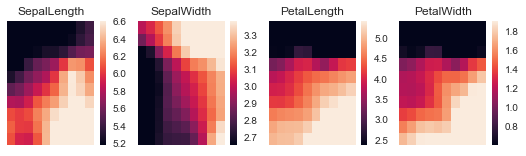

In [55]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(sm, col_sz=7, which_dim="all", denormalize=True)

#### Comment your result 

We have four heatmap, for each numeric data column we have : Petal length, Petal width , Sepal length & Sepal Width 
We know that each square of the heatmap is a unique neuron, the weight is determine from  the codebook vector, computed from the input layer going through the weigths matrix made from  the training of the data. 
And we can see that each attributes of the iris dataset has their own distinctive heatmap.  But we can see similarities on different heatmap.
The first two have an axial symmetry (horizontaly) , representing a possible anti-correlation. And the last two  look really identical, meaning they  have some king of correlation. 

In [50]:
from sompy.visualization.bmuhits import BmuHitsView

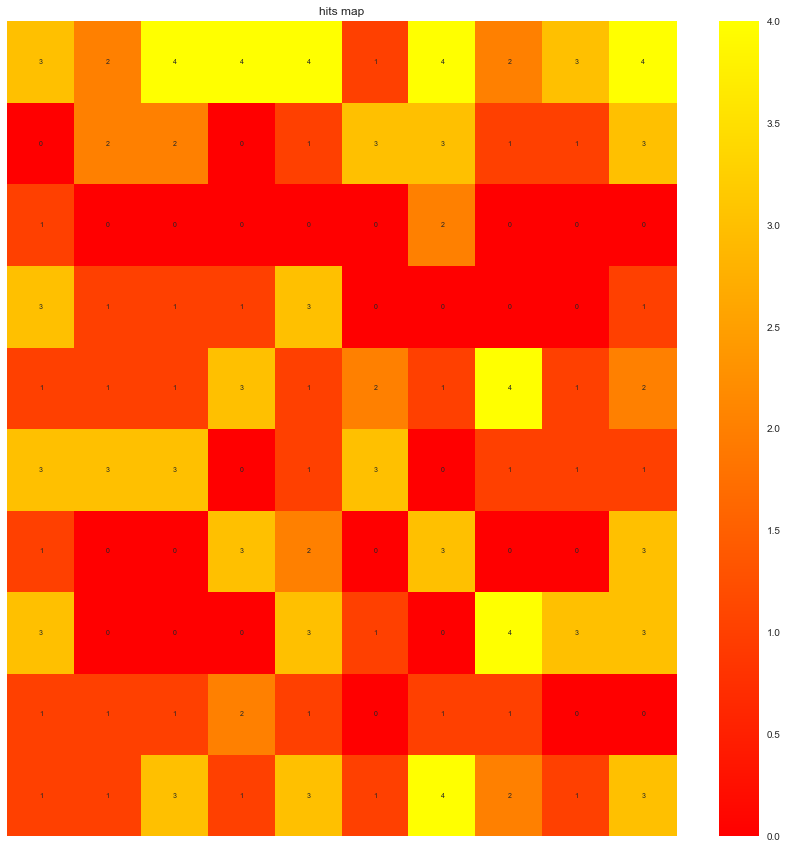

In [51]:
vhs = BmuHitsView(15,15,"hits map", text_size =7)
vhs.show(sm, anotate = True, onlyzeros =False, labelsize = 7, cmap = "autumn", logaritmic = False)
plt.show()

#### Comment your result
We have here the number of data for each neurons, as we can see the number of data for each ones is not equally distrobuted.
We have zeros because we have a mapsize of 10*10, but we only  have 150 samples, so sometimes zeros happen. To reduce the number of zeros we should have a larger number of samples, or we should reduce the size of our map

In [52]:
from sompy.visualization.umatrix import UMatrixView

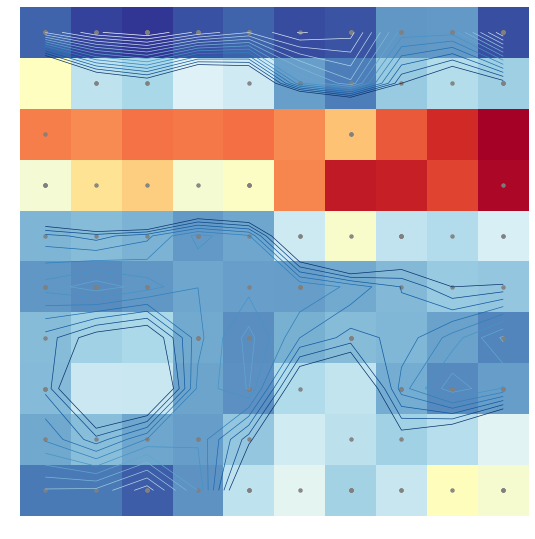

In [53]:
umv = UMatrixView(10,10, "MatrixV",  text_size =10, distance = 2)
umv.show(sm)
plt.show()


The U-Matrix give us a different representation of the Self Organizing Map, adding a topography to the component plane heatmap. We have to reming us that each neuron has the same place as before. 
But the topography allows the representation of the distance between each neuron.
It also help  us the possibility  of clustering in the data, by showing which neurons are closer together, like differents neihborhoods